# Brief explanation of the data-set:
### Title: 
       Haberman's Survival Data

### Sources: 
       (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999

### Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI.
Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Number of Instances: 
    306

### Number of Attributes: 
    4 (including the class attribute)

### Attribute Information:

Age of patient at time of operation (numerical)(Marked as "age")
Patient's year of operation (year - 1900, numerical)(Marked as "year)
Number of positive axillary nodes detected (numerical)(Marked as "surv_5plus)
Survival status (class attribute) 1 = the patient survived 5 years or longer(Marked as "success") 2 = the patient died within 5 year(Marked as "failure")
Missing Attribute Values: None

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
hab = pd.read_csv('haberman.csv', header=None, names=['age','year','lym_nodes', 'surv_5plus'])
print(hab.columns)


Index(['age', 'year', 'lym_nodes', 'surv_5plus'], dtype='object')


Parameters or features to analyse this data set are:
#1) Age
#2) year of treatment
#3) number of lymph nodes
#4) survival at 5 years 

In [7]:
hab

,age,year,lym_nodes,surv_5plus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [7]:
hab.columns

Index(['age', 'year', 'lym_nodes', 'surv_5plus'], dtype='object')

In [11]:
(hab["surv_5plus"]).value_counts()

1    225
2     81
Name: surv_5plus, dtype: int64

# observations:
#. total number of survivors after 5 years: 81;
#. number of deaths within 5 years: 225;
#. we are dealing with imbalanced dataset;

In [12]:
hab.describe()

,age,year,lym_nodes,surv_5plus
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Oberservations:
#. The maximum lymph nodes a person has got are 52
#. The minimum lymph nodes a person has got are 0 
#. Many people got the treatment done around the year 1962-1963
#. People from age 30 to 83 years of age are suffering.

# Converting the data-set into categorical form: 

In [13]:
hab["surv_5plus"]=hab["surv_5plus"].map({2:"failure",1:"success"})

In [14]:
hab

,age,year,lym_nodes,surv_5plus
0,30,64,1,success
1,30,62,3,success
2,30,65,0,success
3,31,59,2,success
4,31,65,4,success
5,33,58,10,success
6,33,60,0,success
7,34,59,0,failure
8,34,66,9,failure
9,34,58,30,success


In [16]:
hab["surv_5plus"]=success.value_counts()

success    225
failure     81
Name: surv_5plus, dtype: int64

# Observations:
#1) 73.5% people have survived for 5 or longer years
#2) 26.5% people have died within 5 years

# Performing Histogram and PDF on this data-set

In [17]:
import numpy as np

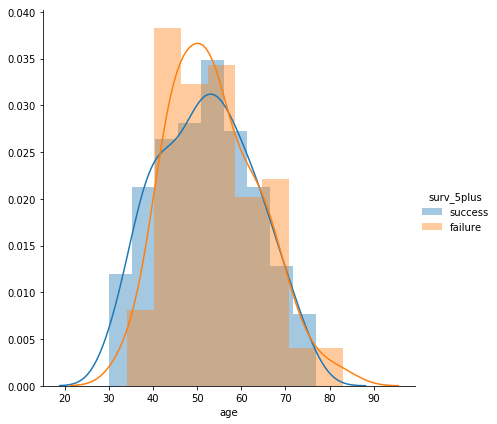

In [90]:
sns.FacetGrid(hab, hue="surv_5plus", height=6).map(sns.distplot, "age").add_legend();
plt.show()

# Observations:
#1) There is lot of overlapping between people ages of success and failure. 
#2) Age is not a proper metric to analyse the situation
#3) From the histogram, It's clear that 40-45yrs old people died the most before 5 years.

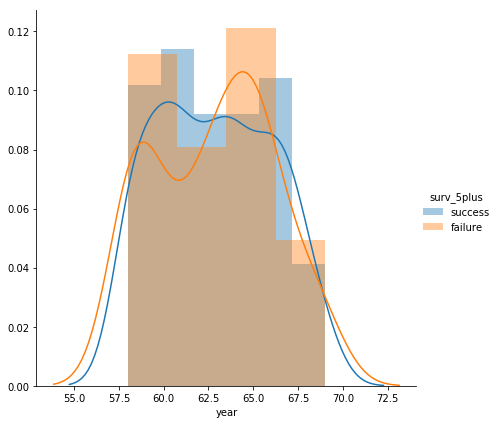

In [89]:
sns.FacetGrid(hab, hue="surv_5plus", height=6).map(sns.distplot, "year").add_legend();
plt.show()

# observations:
#1) Here also there is lot of overlapping between the year of treatment and the survival status of the person. 
#2) The overlapping, infact, is more than that of 'age' metric.   

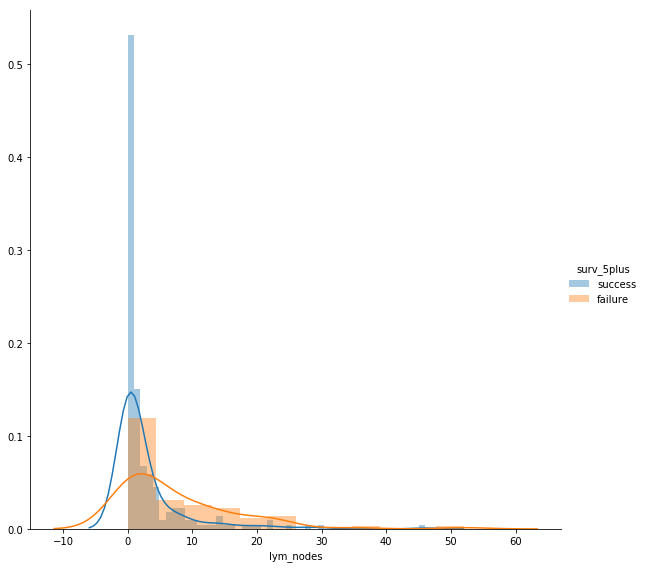

In [88]:
sns.FacetGrid(hab, hue="surv_5plus", height=8).map(sns.distplot, "lym_nodes").add_legend();
plt.show()

# observations:
#1) The overlapping for survival at 5 years is relatively less than the above two features
#2) The threshold value is around 2 lymph nodes.
#3) From the histogram it's evident that people having 0-3 lymph nodes survived in more numbers after 5 years.

# Plotting Cumulative Density function  

In [37]:
#hab=pd.read_csv("haberman.csv")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
hab = pd.read_csv('haberman.csv', header=None, names=['age','year','lym_nodes', 'surv_5plus'])
hab["surv_5plus"]=hab["surv_5plus"].map({2:"failure",1:"success"})
s = hab.loc[hab["surv_5plus"] == "success"]
f = hab.loc[hab["surv_5plus"] == "failure"]


### For people who have survived after 5 years

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


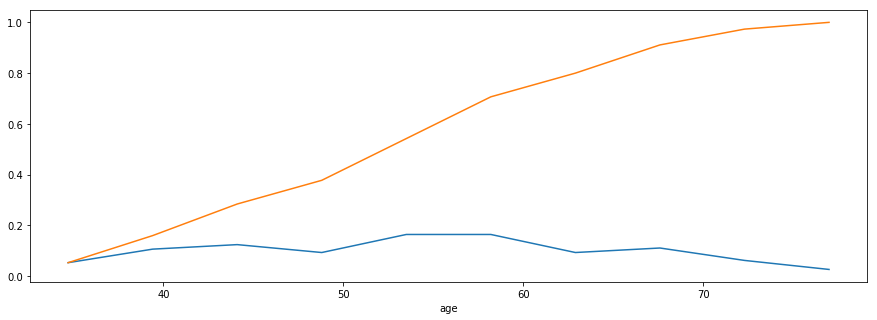

In [95]:
plt.figure(figsize=(15,5))
counts, bin_edges = np.histogram(s["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.xlabel("age")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
print(pdf);
print(bin_edges)



[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


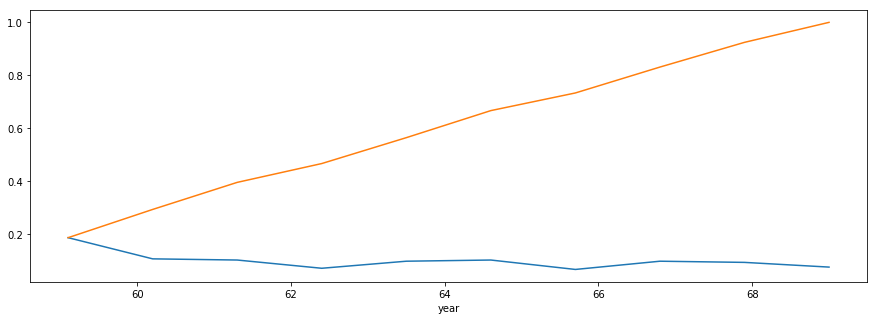

In [96]:
plt.figure(figsize=(15,5))
counts, bin_edges = np.histogram(s["year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.xlabel("year")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
print(pdf);
print(bin_edges)

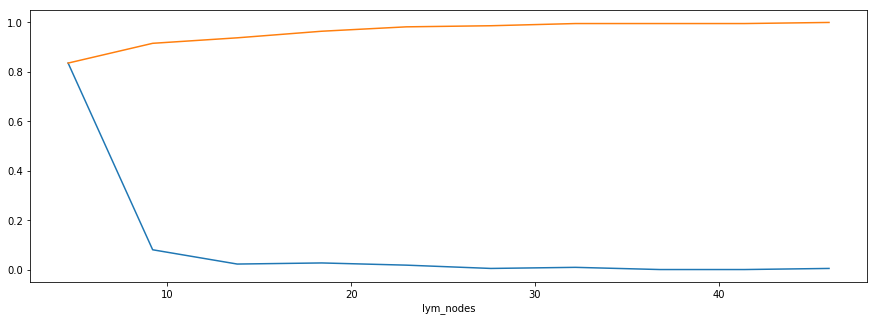

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


In [97]:
plt.figure(figsize=(15,5))
counts, bin_edges = np.histogram(s["lym_nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("lym_nodes")
plt.show()
print(pdf);
print(bin_edges)

### For people who have not survived within 5 years

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


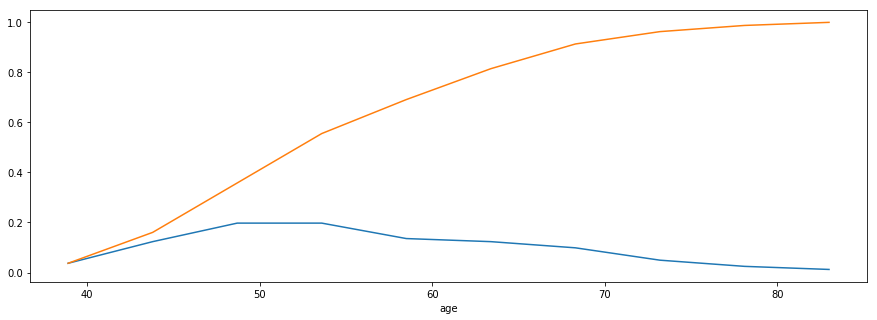

In [100]:
plt.figure(figsize=(15,5))
counts, bin_edges = np.histogram(f["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.xlabel("age")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
print(pdf);
print(bin_edges)


[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


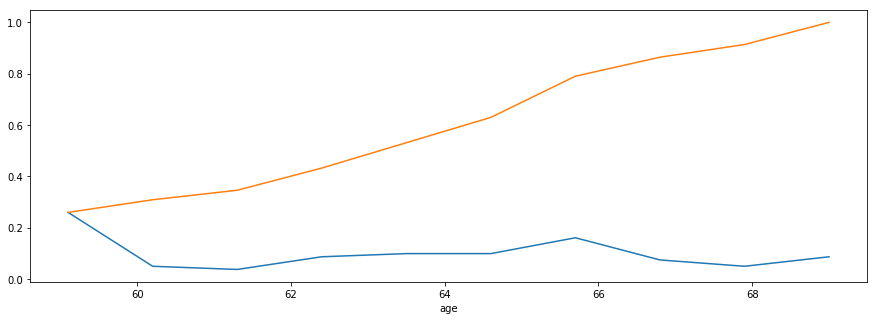

In [101]:
plt.figure(figsize=(15,5))
counts, bin_edges = np.histogram(f["year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.xlabel("age")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
print(pdf);
print(bin_edges)

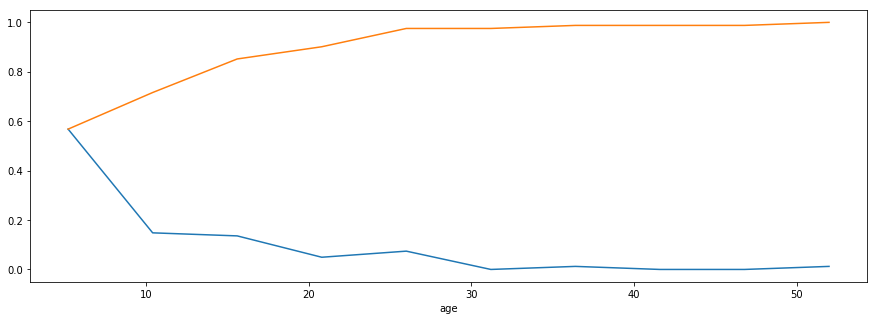

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


In [102]:
plt.figure(figsize=(15,5))
counts, bin_edges = np.histogram(f["lym_nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("age")
plt.show()
print(pdf);
print(bin_edges)


# Observation:
#1) By plotting CDF for all the features for Success and failure we can evaluate what percentage of success or failure a person can have before some point on the x-axis. (All the features have been plotted on x-axis)
#2) The CDF of a point is basically sum of all points or histograms that is present before that point.

# Plotting box-plots:

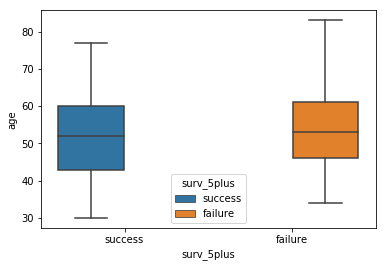

In [76]:
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
hab = pd.read_csv('haberman.csv', header=None, names=['age','year','lym_nodes', 'surv_5plus'])
hab["surv_5plus"]=hab["surv_5plus"].map({2:"failure",1:"success"})
s = hab.loc[hab["surv_5plus"] == "success"]
f = hab.loc[hab["surv_5plus"] == "failure"]
sns.boxplot(x="surv_5plus",y="age",hue="surv_5plus",data = hab)
plt.show()

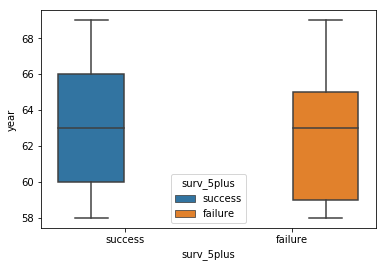

In [79]:
s = hab.loc[hab["surv_5plus"] == "success"]
f = hab.loc[hab["surv_5plus"] == "failure"]
sns.boxplot(x="surv_5plus",y="year",hue="surv_5plus",data = hab)
plt.show()

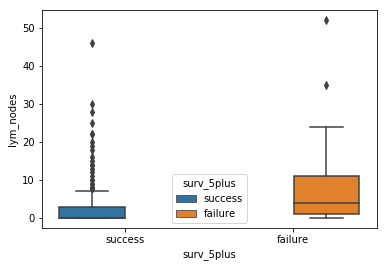

In [80]:
s = hab.loc[hab["surv_5plus"] == "success"]
f = hab.loc[hab["surv_5plus"] == "failure"]
sns.boxplot(x="surv_5plus",y="lym_nodes",hue="surv_5plus",data = hab)
plt.show()

# Observations:
#1) In box-plots, the upper bar is the 75-percentile mark. The middle bar is the 50-percentile mark
    or the median and the lower bar is 25-percentile mark
#2) It is also very important to know that with the advancement of technology for opertion from year 1965,
    more people have survived after 5 years.


# plotting voilin plots:

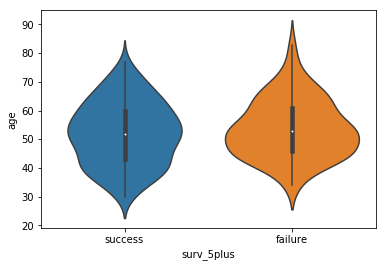

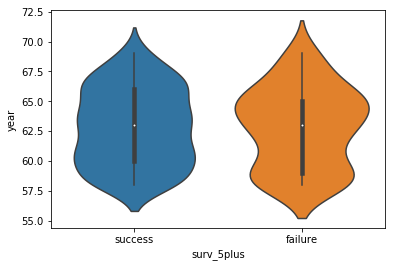

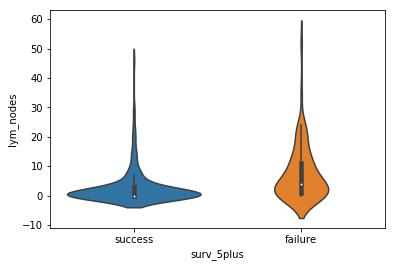

In [84]:
sns.violinplot(x="surv_5plus", y="age", data=hab, size=8)
plt.show()
sns.violinplot(x="surv_5plus", y="year", data=hab, size=8)
plt.show()
sns.violinplot(x="surv_5plus", y="lym_nodes", data=hab, size=8)
plt.show()

# Observations:
#1) The Voilin plots are more insightful because they provide the data from PDFs and box-plots combined. 
#2) The middle white dot gives us the 50-percentile mark.

# Plotting pair plots:

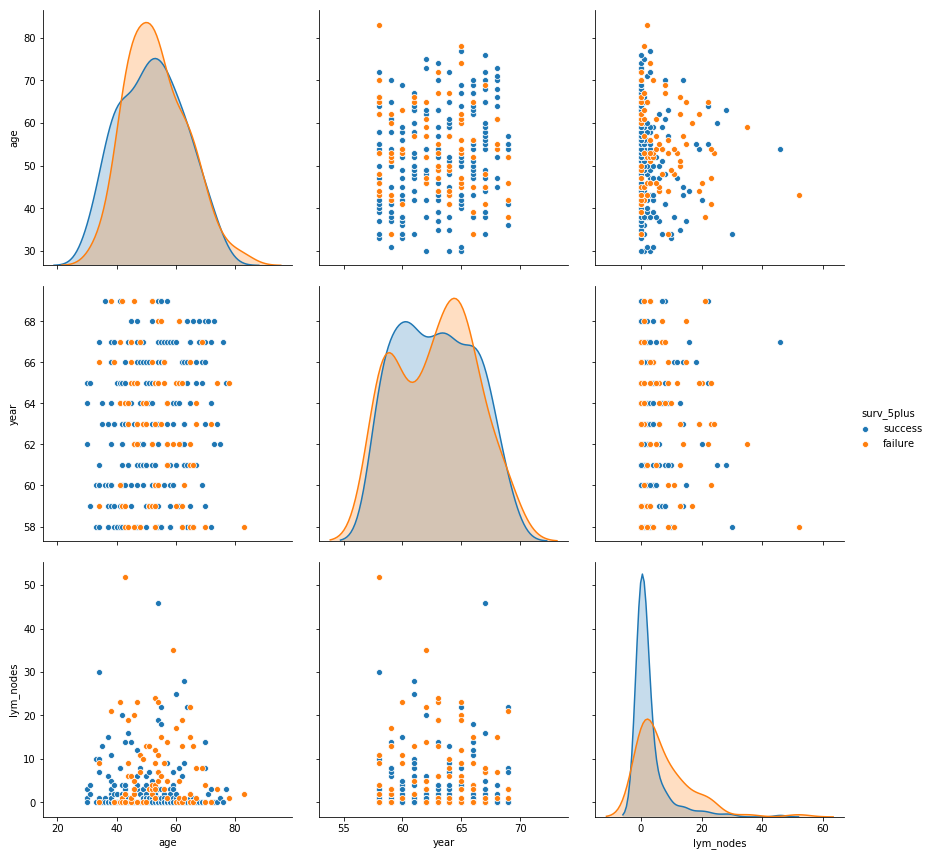

In [87]:
#scatter plots are nothing but 2D plots(involves 2 features)
sns.pairplot(hab, hue='surv_5plus', height=4)
plt.show()

# Observations:
#1) Almost all the graphs are clumsy as in the points overlap alot not giving us the proper analysis.
#2) The graphs of age vs year and year vs lym_nodes are better to analyse than the rest.
#3) The graphs of age vs lym_nodes almost gives us no idea about the scenario as the points overlap alot. 